In [1]:
%matplotlib inline
import numpy as np
from sklearn import svm
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
with open("/home/christopher/data/ml/digit-recognizer/train.csv", "r") as data:
    fullTrain = np.loadtxt(data, delimiter=",", skiprows=1, dtype="float64")
with open("/home/christopher/data/ml/digit-recognizer/test.csv", "r") as data:
    fullTest = np.loadtxt(data, delimiter=",", skiprows=1, dtype="float64")

In [3]:
train = fullTrain
test = fullTest

In [4]:
trainResults = train[:,0]
trainData = train[:,1:]
testData = test

# Scaling

We need to scale our data to have mean 0, variance 1. 

In [20]:
scaler = preprocessing.StandardScaler().fit(trainData)
scaledTrainData = scaler.transform(trainData)
scaledTestData = scaler.transform(testData)

# PCA

Not all of the components of our vectors have useful data. We can run PCA to determine which + how many components we need.

First, let us just play with the data and see how many components are needed to get certain percentages of data explained.

Then we can apply a cut.

In [45]:
from sklearn.decomposition import PCA
pcaTest = PCA()
pcaTest.fit(scaledTrainData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(0.8, 1.0)

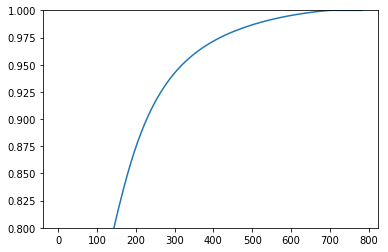

In [46]:
cumulative_explained = [0]
for i in range(len(pcaTest.explained_variance_ratio_)):
    cumulative_explained.append(sum(pcaTest.explained_variance_ratio_[:i+1]))
plt.plot(cumulative_explained)
plt.ylim([0.8, 1.0]) # we only care about the high end

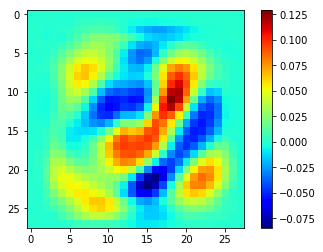

In [81]:
# Let's look at some components
plt.imshow(pcaTest.components_[5].reshape(28,28), cmap='jet')
plt.colorbar()

## Now PCA for reals

In [82]:
pca = PCA(n_components=0.99, whiten=True) # understand and then consider whitening
pca.fit(scaledTrainData)
redScaledTrainData = pca.transform(scaledTrainData)
redScaledTestData = pca.transform(scaledTestData)

# Fit

Fit a support vector classification model to our data then predict our test data from that.

In [83]:
clf = svm.SVC()#gamma=0.001, kernel="sigmoid")   
_ = clf.fit(redScaledTrainData, trainResults)

In [84]:
res = clf.predict(redScaledTestData)

In [85]:
with open("results.csv", "w") as f:
    f.write("ImageId,Label\n")
    for i, r in enumerate(res):
        f.write("{},{}\n".format(i+1, int(r)))